In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:

df=pd.read_csv('Powerplant_India.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 907
No of Columns: 27


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
df.isin([' ','NA','-','?']).sum().any()

False

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [8]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
generation_gwh_2019                907      100.000000
generation_gwh_2013                907      100.000000
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
latitude                            46        5.071665
longitude                           46        5.071665
geolocation_source                  19        2.094818
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
name                                 0        0.000000


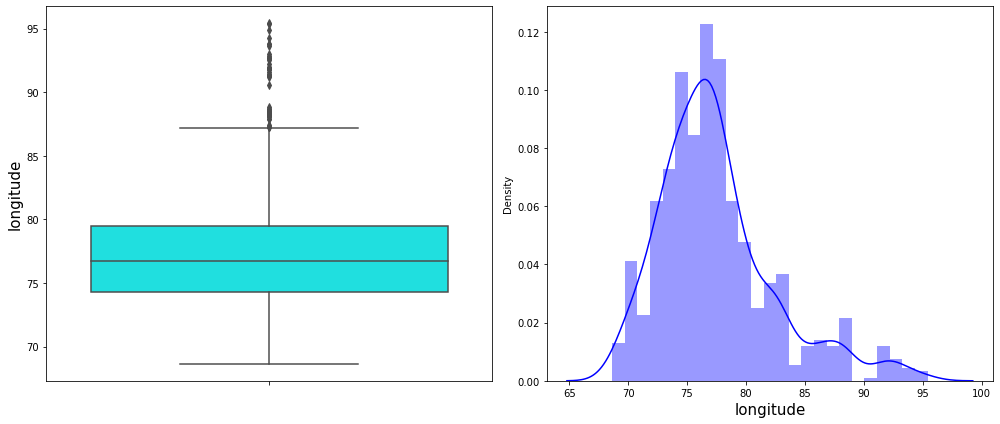

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

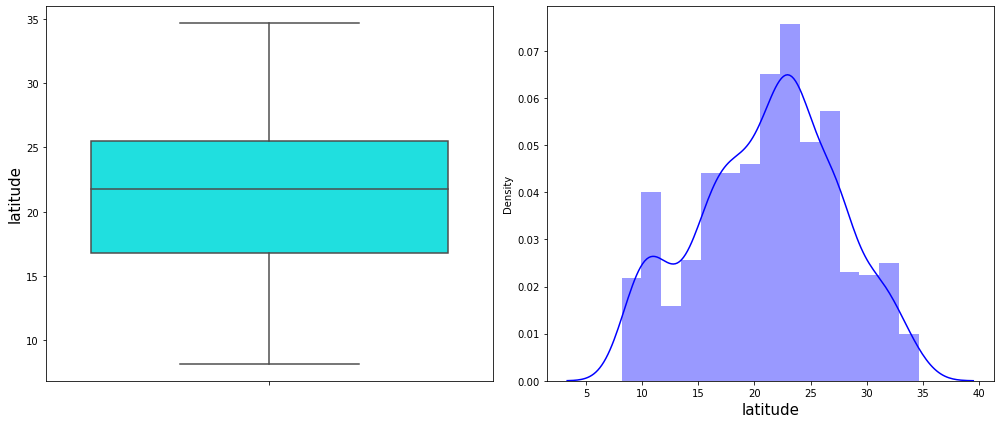

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

In [11]:
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [12]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
generation_gwh_2019                907      100.000000
generation_gwh_2013                907      100.000000
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
name                                 0        0.000000
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
longitude                            0        0.000000
latitude                             0        0.000000
geolocation_source                   0        0.000000


In [13]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,907.000000,907.000000,527.000000,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0
mean,326.223755,21.197918,77.427103,1997.091082,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
std,590.085456,6.079148,4.815073,17.082868,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN
min,0.000000,8.168900,68.644700,1927.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,17.072000,74.388900,1988.000000,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN
50%,59.200000,21.281800,76.719500,2001.000000,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,385.250000,25.176450,79.206100,2012.000000,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN
max,4760.000000,34.649000,95.408000,2018.000000,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


In [14]:
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [15]:
df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,NaN,27594.0,29047.0,30015.0,35116.0,35136.0,NaN,Central Electricity Authority


In [16]:
df.loc[df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


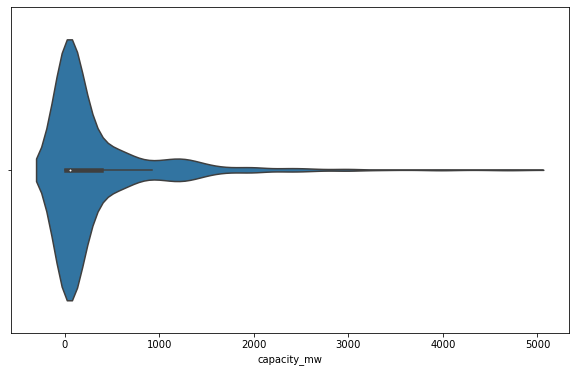

In [17]:
plt.figure(figsize=(10,6))
sns.violinplot(df.capacity_mw)
plt.show()

In [18]:
df.loc[df.capacity_mw >1500].shape

(39, 17)

In [19]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

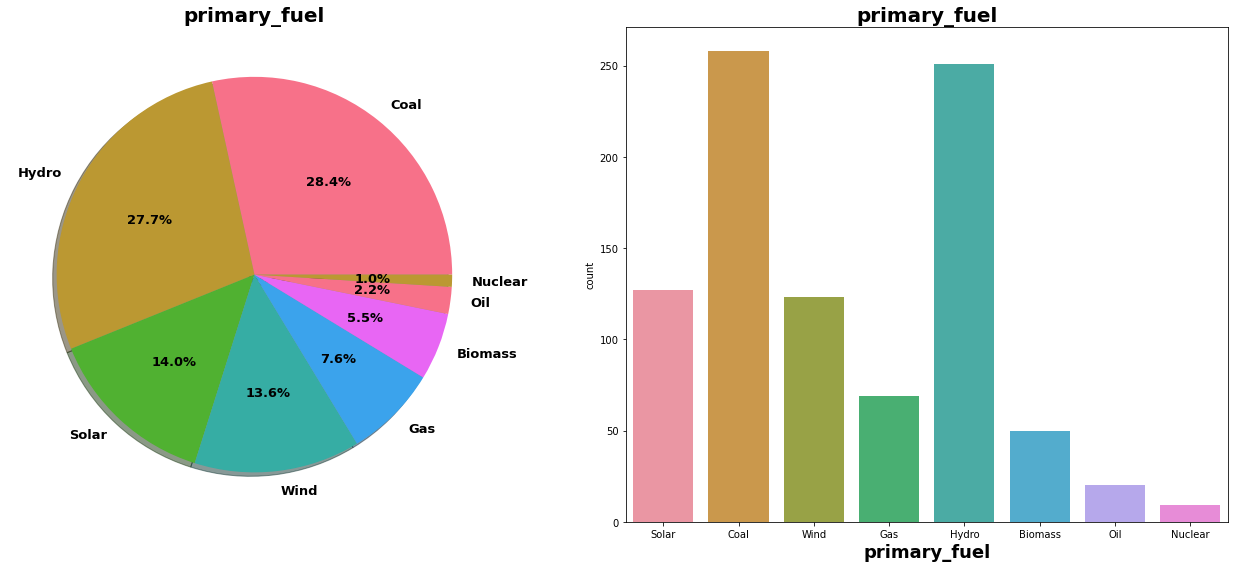

In [20]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('primary_fuel',data=df,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("primary_fuel",fontsize=18,fontweight ='bold')
plt.show()

In [21]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [22]:
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 295884.946 MW


In [23]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


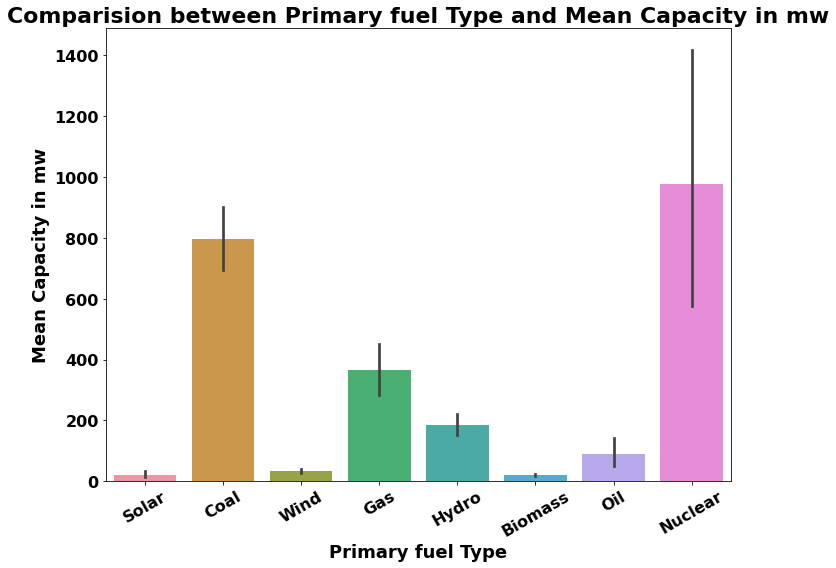

In [24]:
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

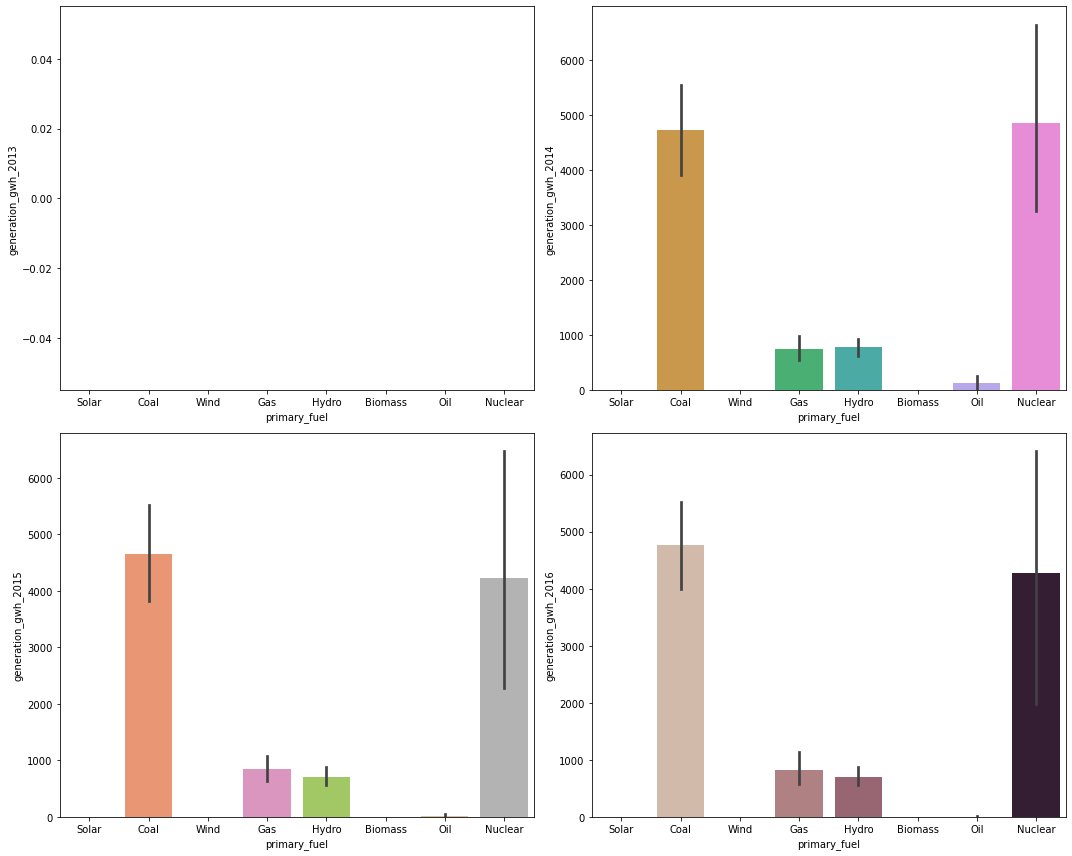

In [25]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.barplot(x='primary_fuel',y='generation_gwh_2013',ax=axes[0,0],data=df)
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=df)
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="Set2")
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

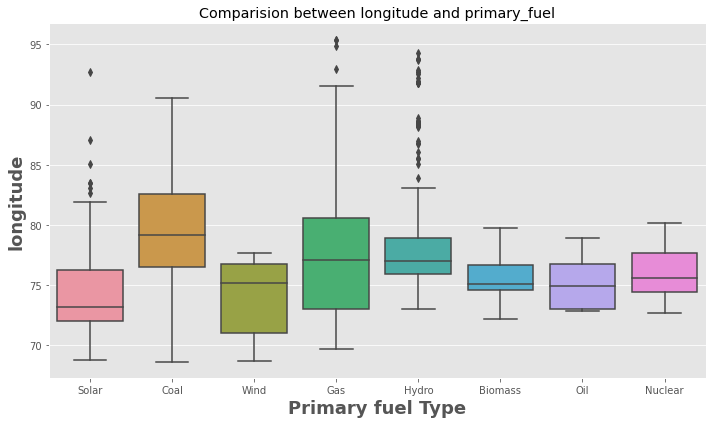

In [26]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(df['primary_fuel'],df["longitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

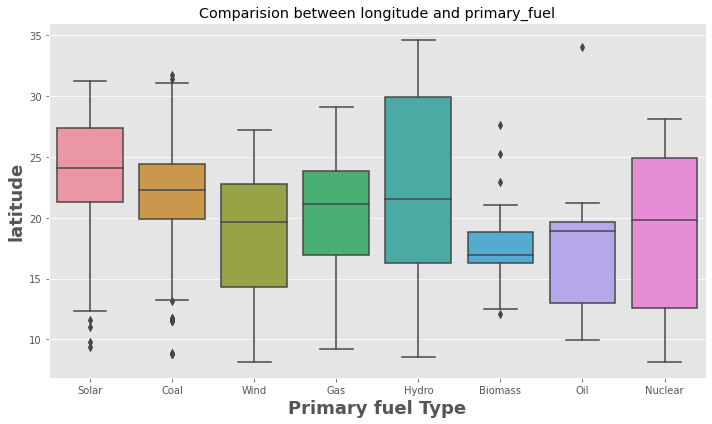

In [27]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(df['primary_fuel'],df["latitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

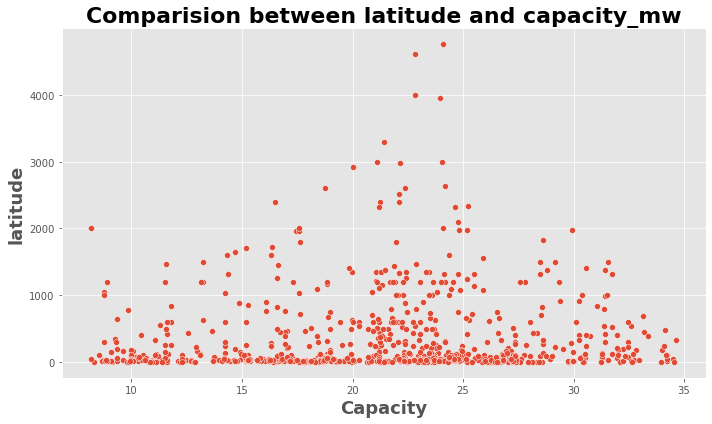

In [28]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.scatterplot(df['latitude'],df["capacity_mw"])
a.set_xlabel('Capacity',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

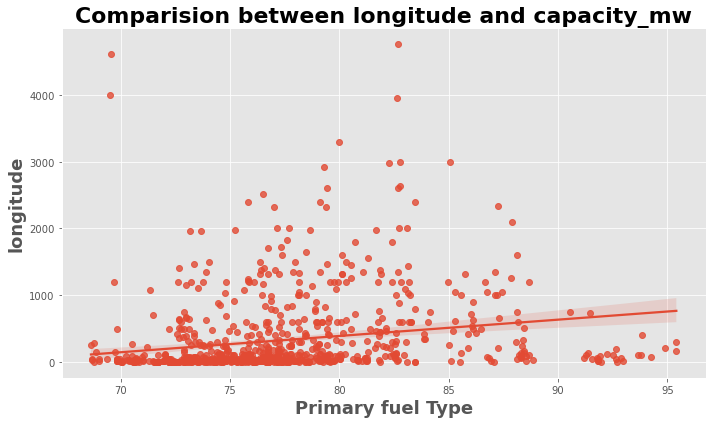

In [29]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.regplot(df['longitude'],df["capacity_mw"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

In [30]:
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [31]:
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [32]:
df.loc[df.Power_plant_age==91]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,Power_plant_age
728,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,NaN,220.82035,215.3777,144.4143,175.92595,282.76905,NaN,Central Electricity Authority,91.0


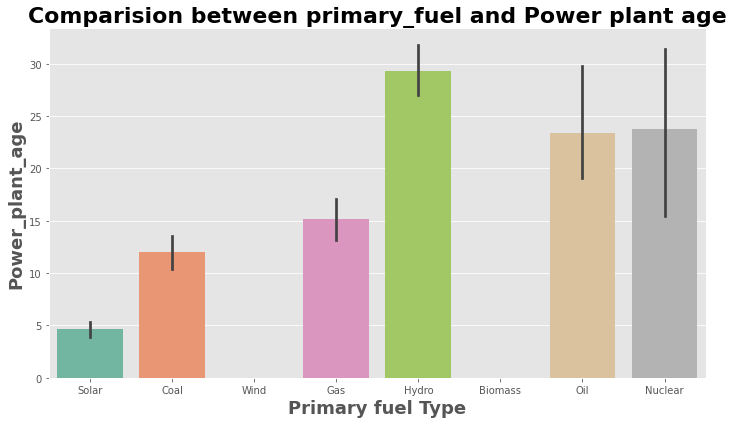

In [33]:
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=18,fontweight ='bold')
plt.show()

<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

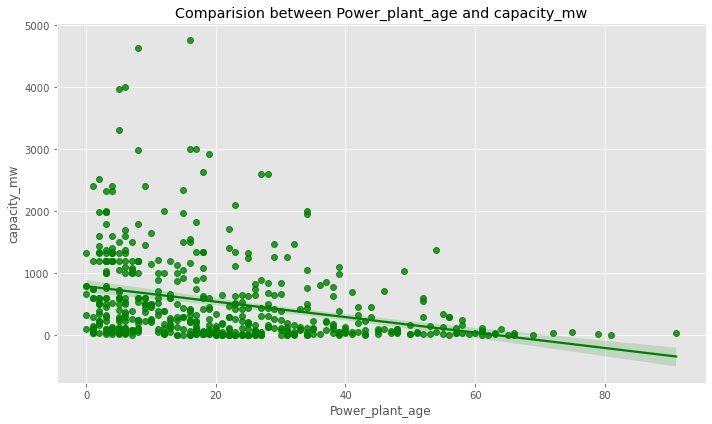

In [34]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = "g")

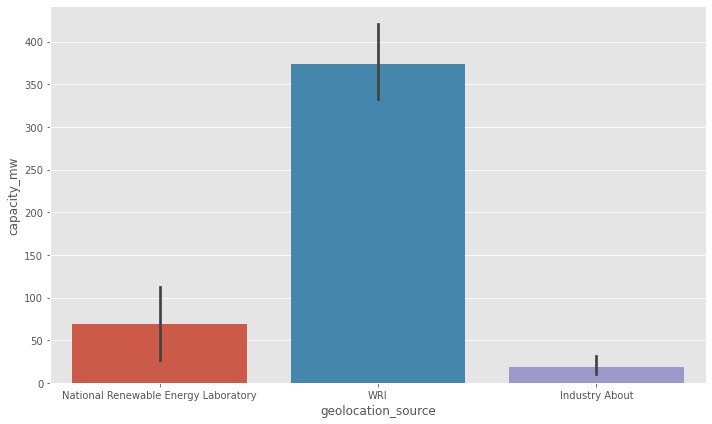

In [35]:
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

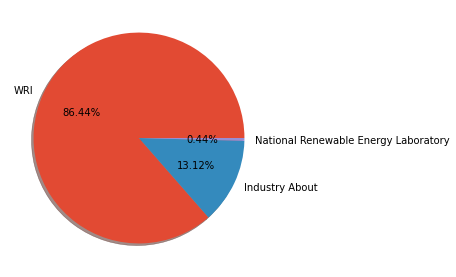

In [36]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [37]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']

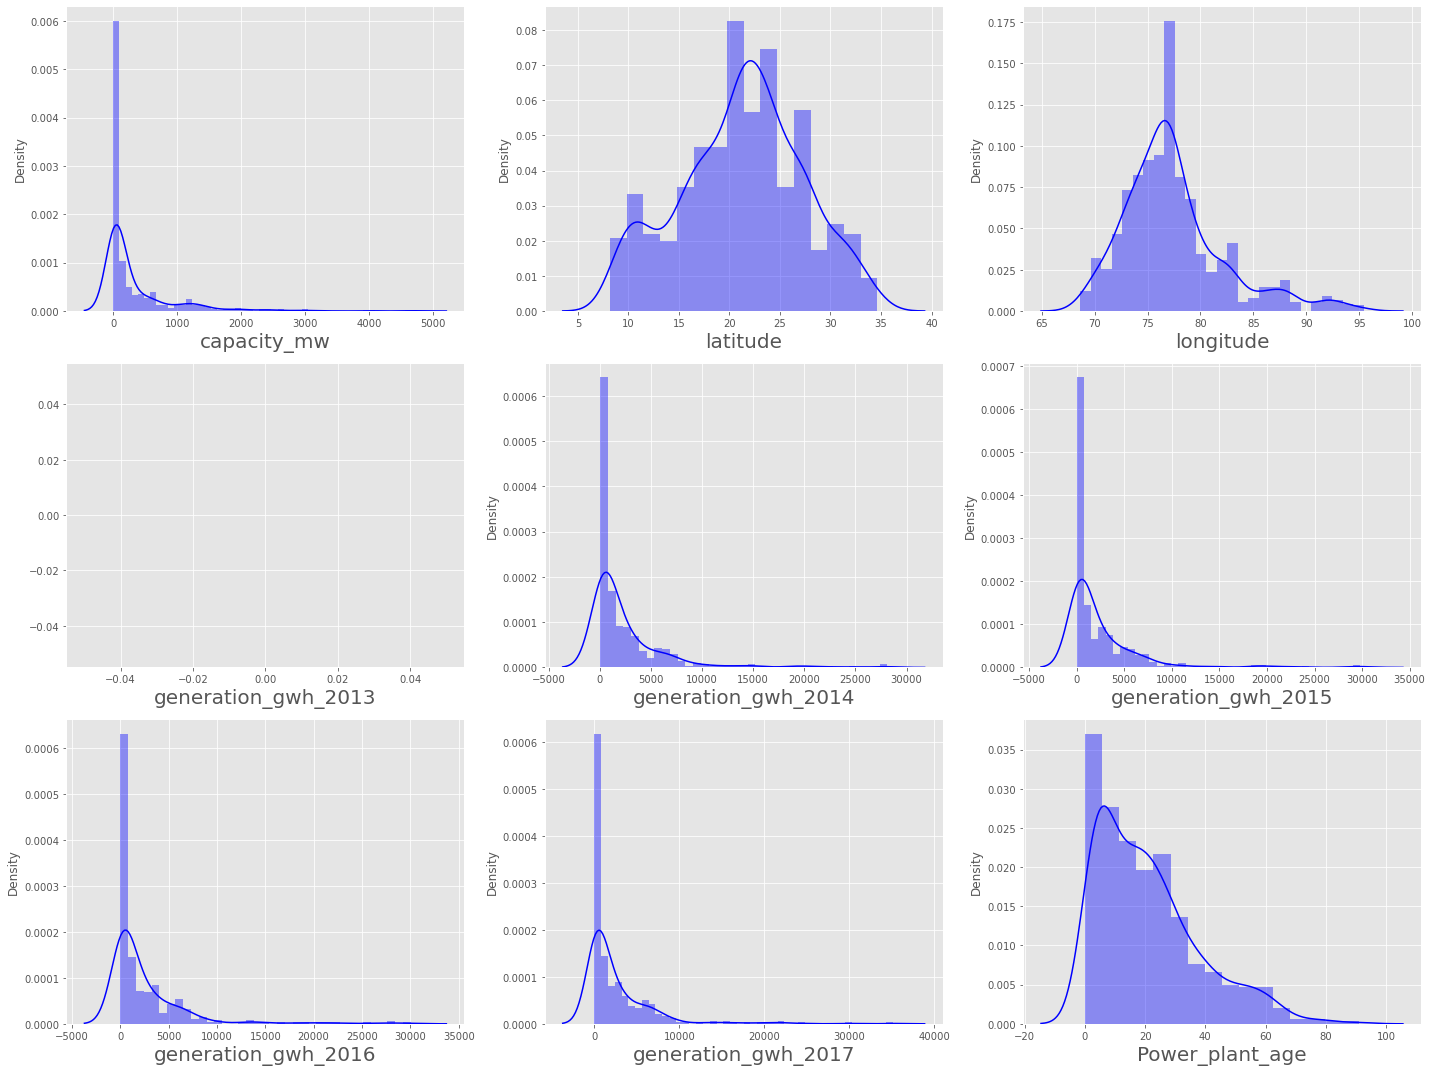

In [38]:


plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

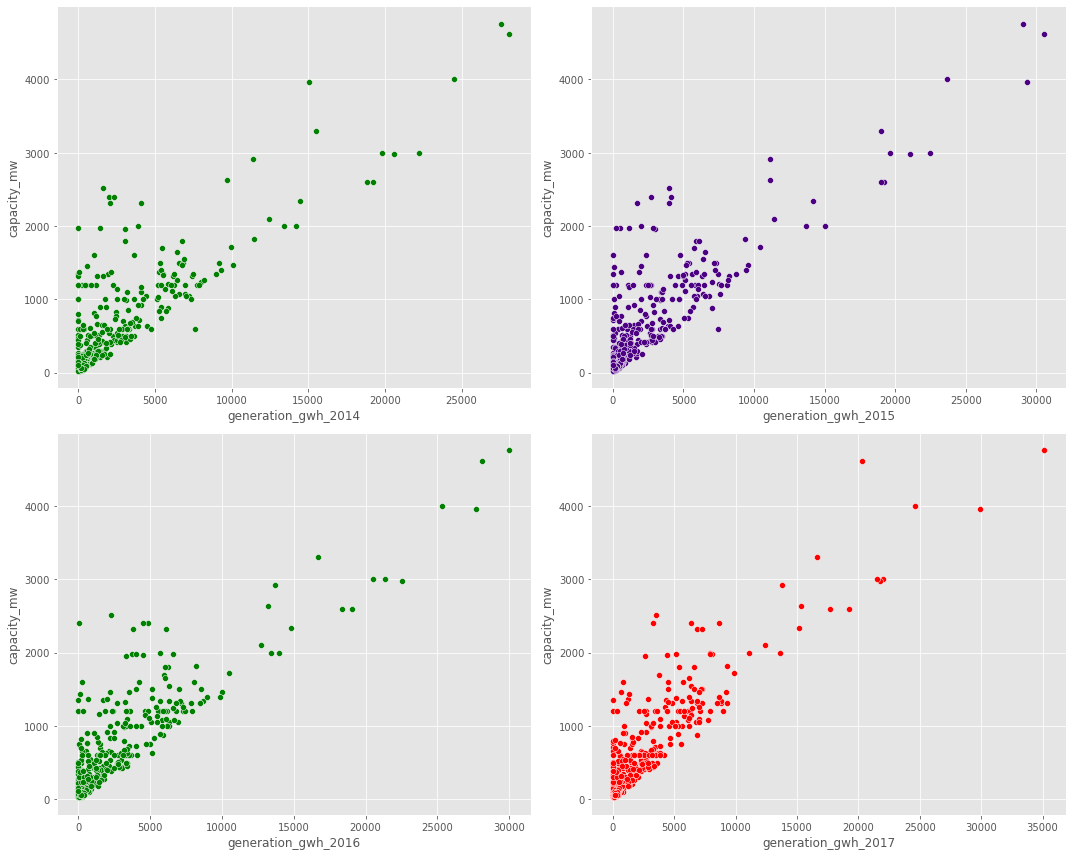

In [39]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")

sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")
plt.show()

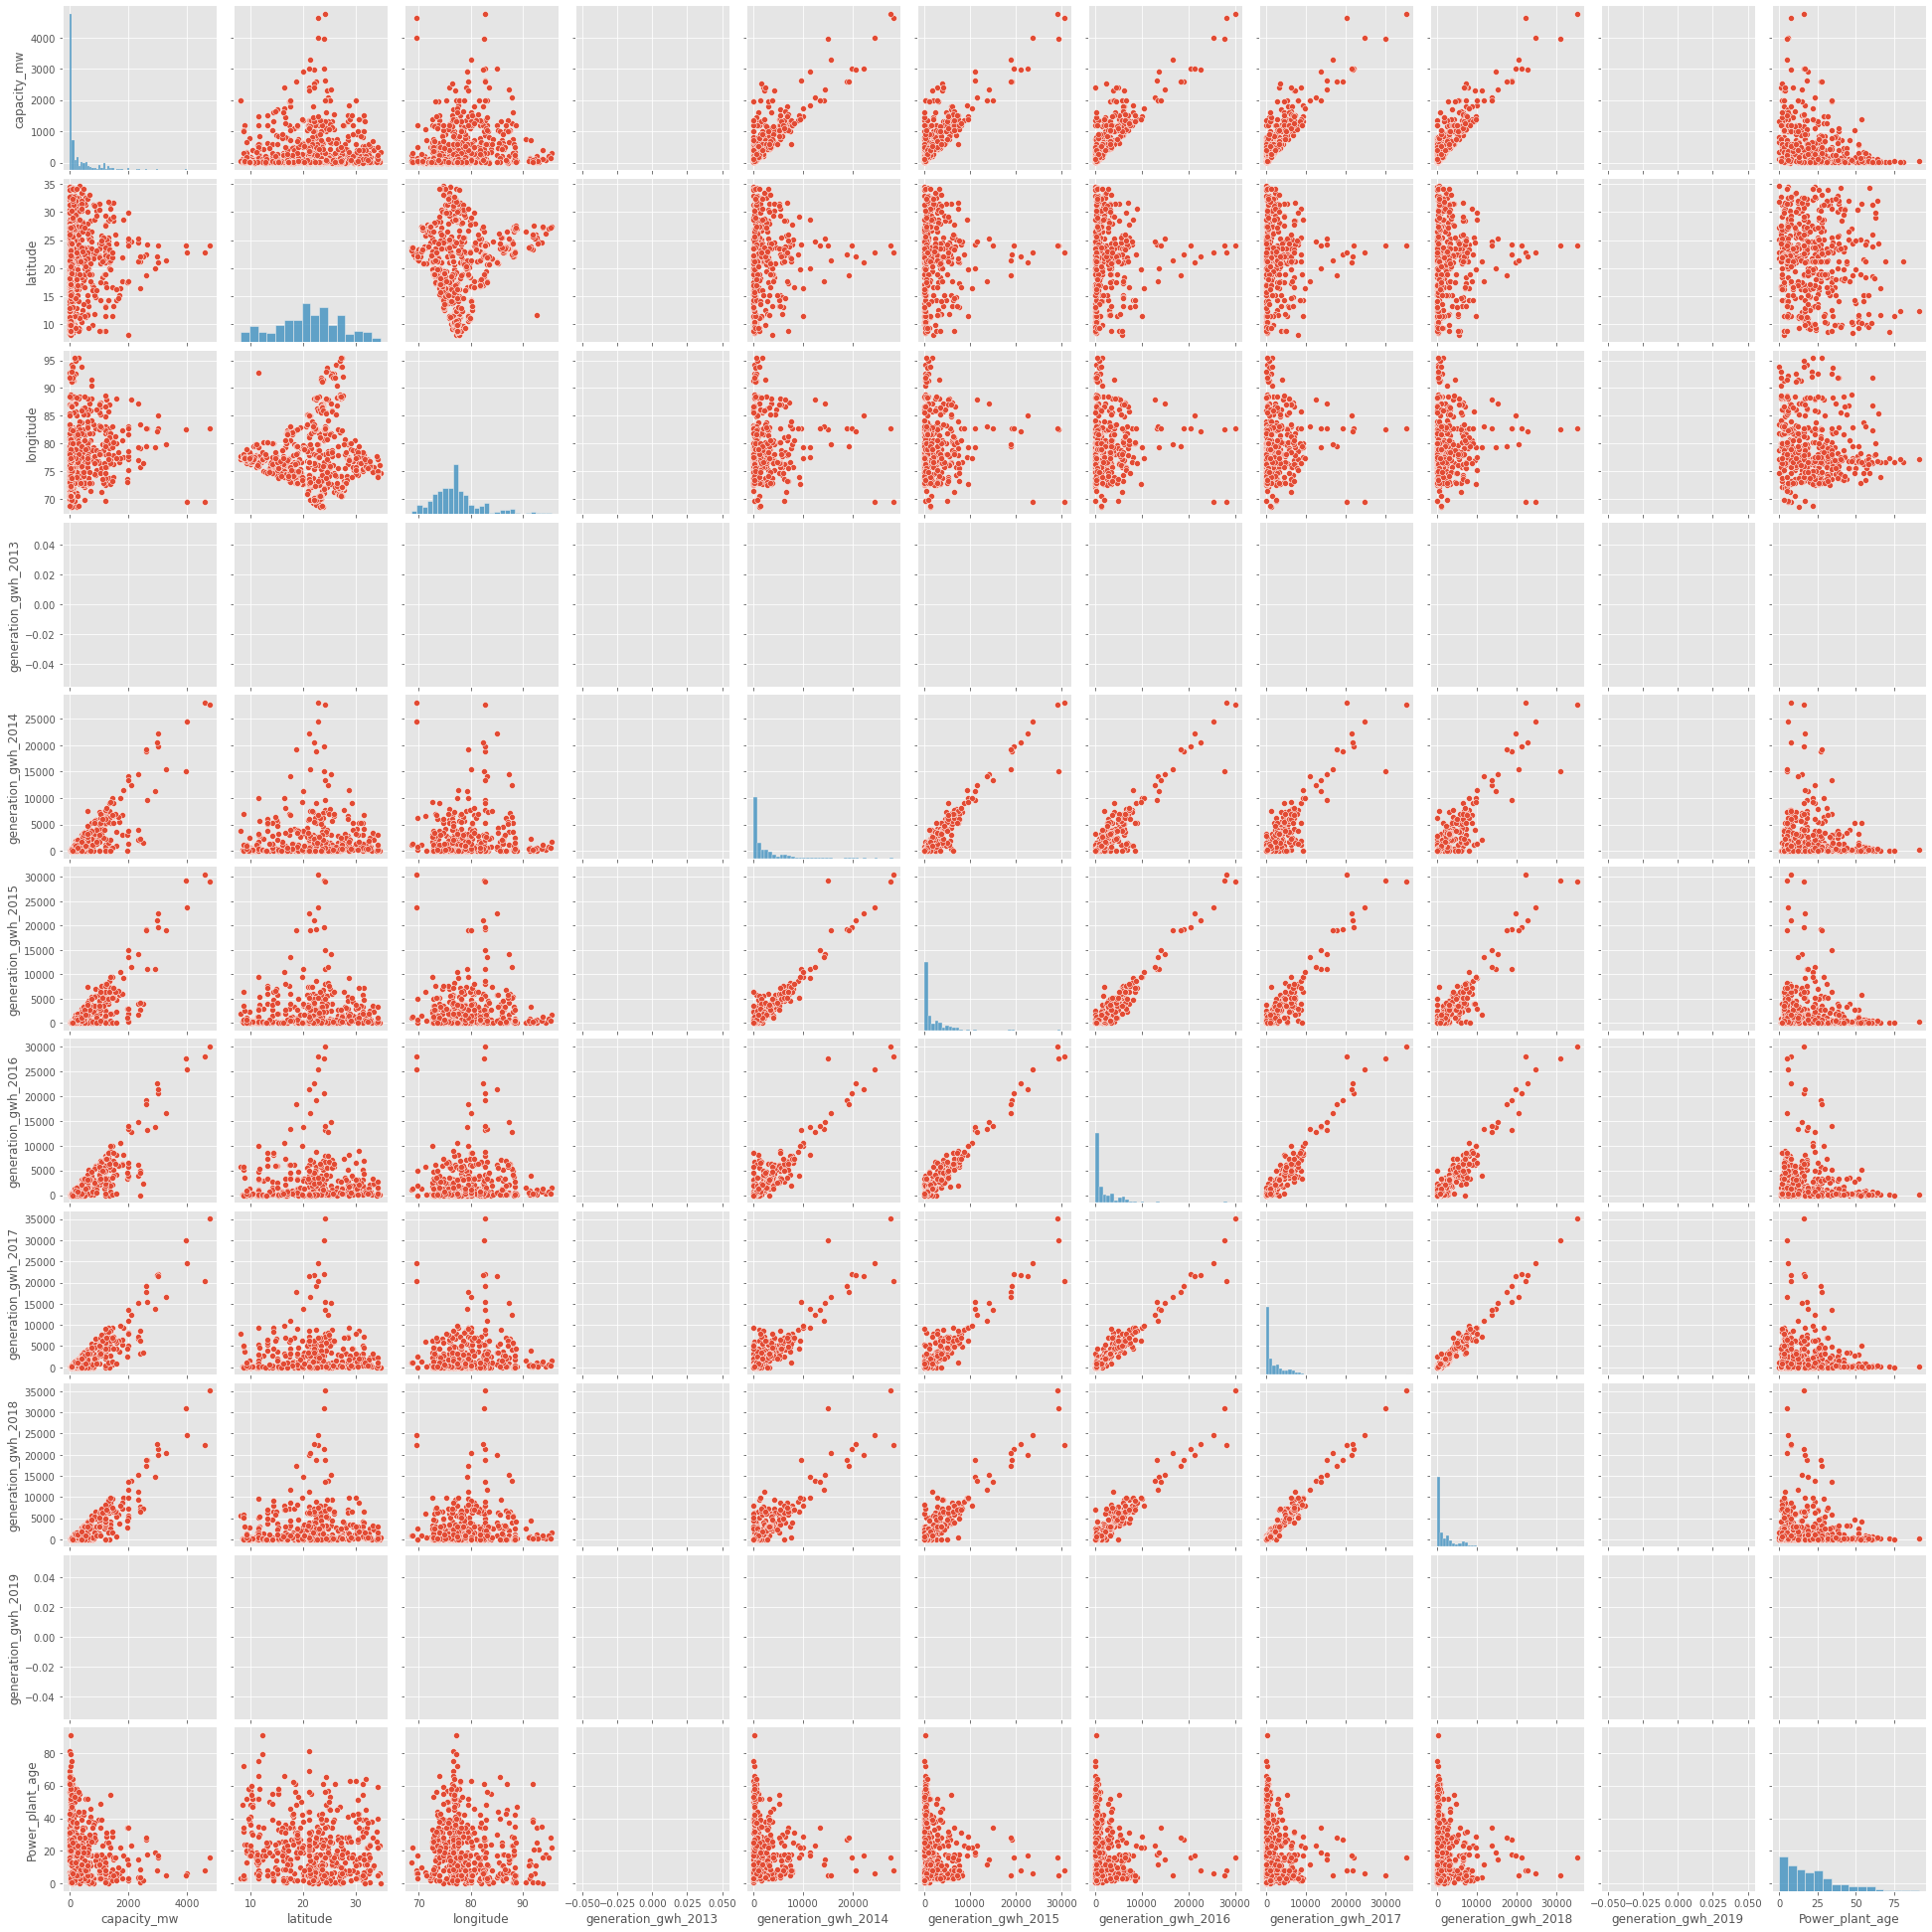

In [40]:

sns.pairplot(df)

In [41]:
df.drop(columns=['name'],axis=1,inplace=True)

In [42]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [43]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,3.0


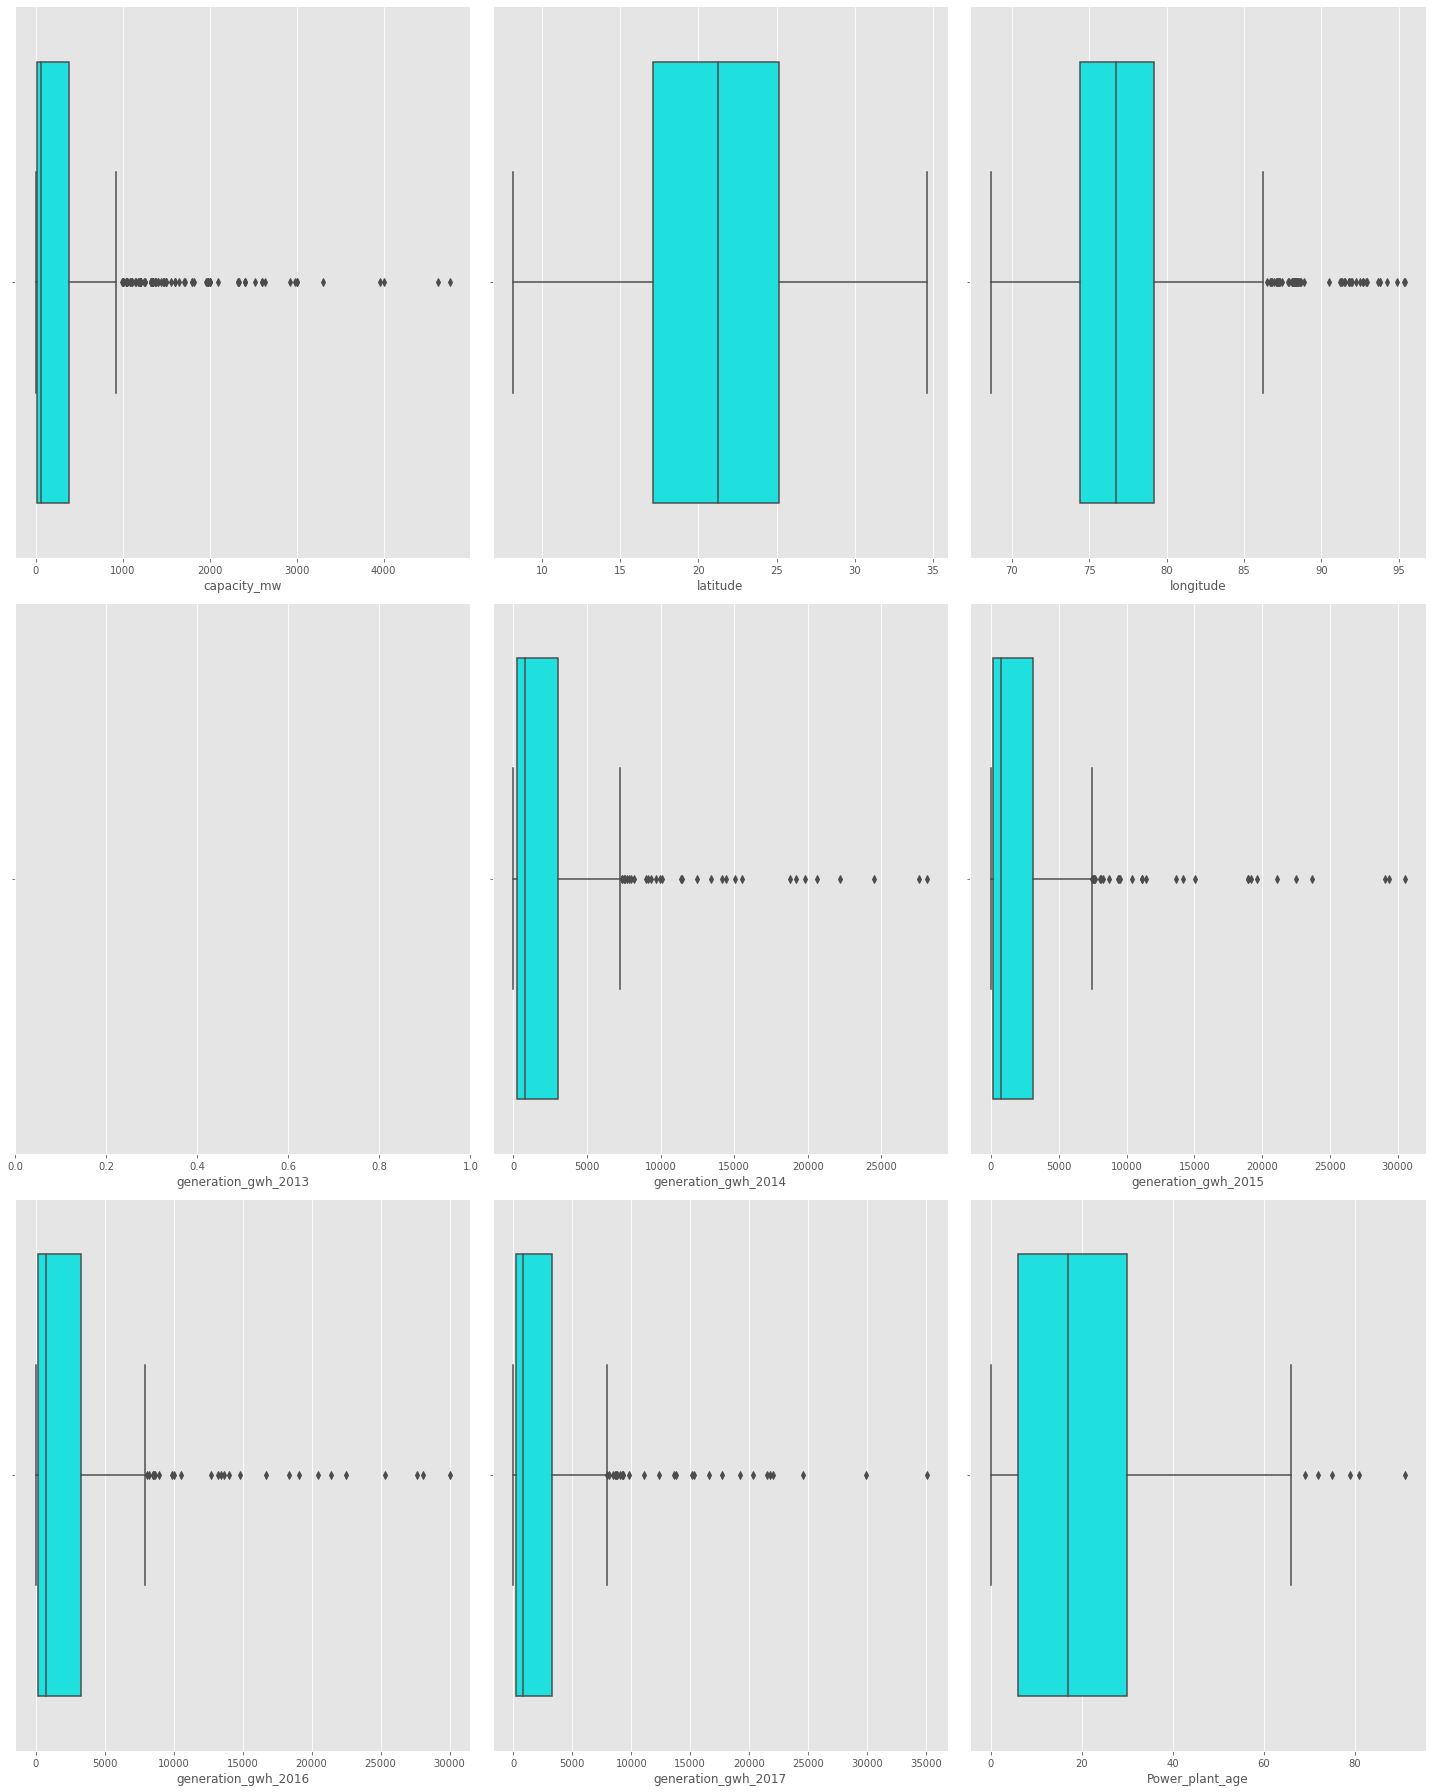

In [45]:
plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [46]:
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [47]:
df2=df.copy

In [48]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2013           NaN
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
generation_gwh_2019           NaN
Power_plant_age          39.00000
dtype: float64


In [49]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 13)


In [50]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


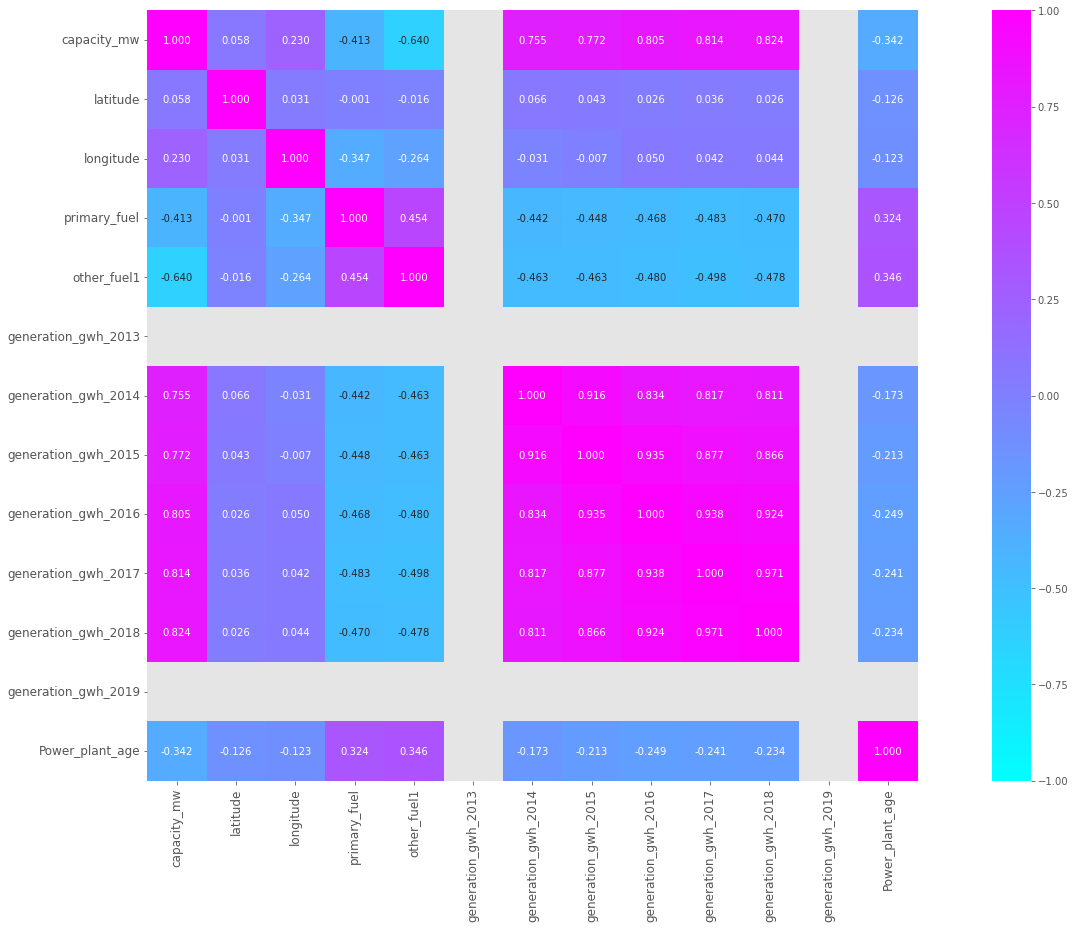

In [51]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

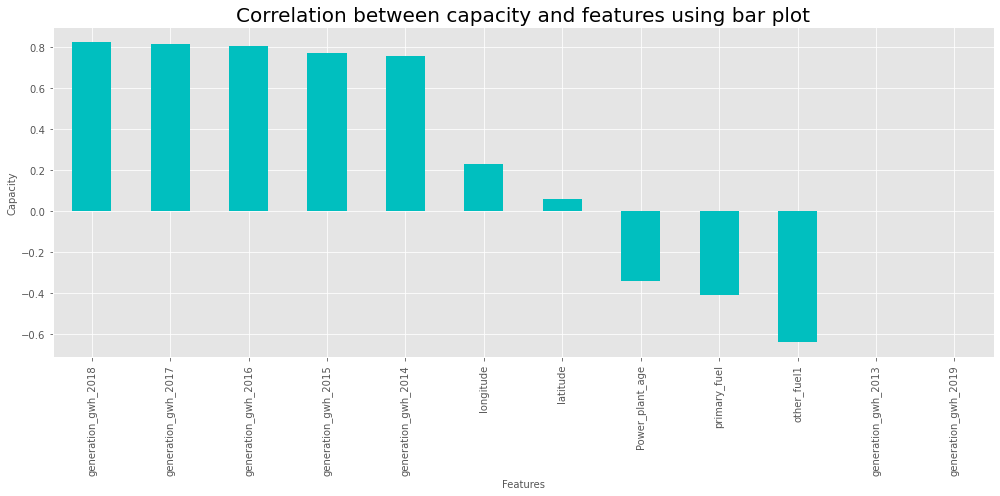

In [52]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

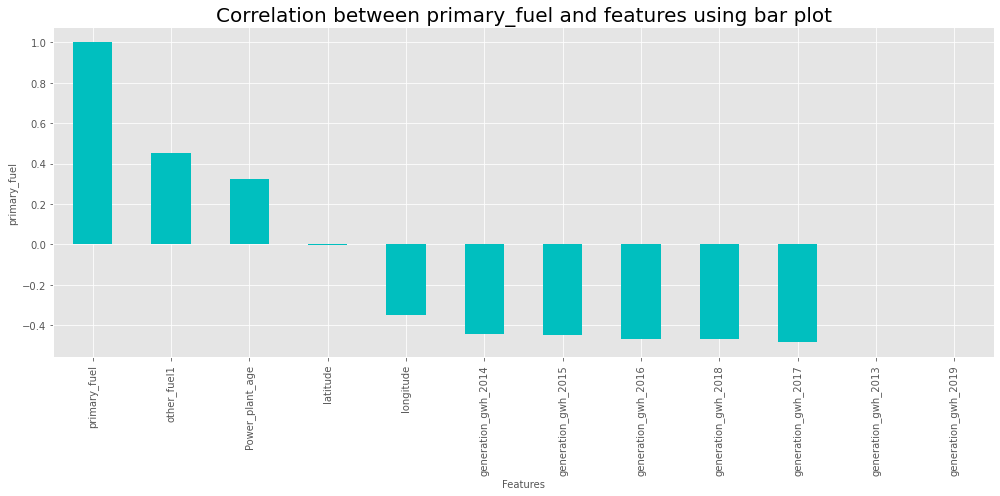

In [53]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

## Skewness

In [54]:
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              1.221398
primary_fuel           0.425807
other_fuel1           -1.831505
generation_gwh_2013         NaN
generation_gwh_2014    1.610443
generation_gwh_2015    1.536958
generation_gwh_2016    1.594947
generation_gwh_2017    1.489783
generation_gwh_2018    1.532123
generation_gwh_2019         NaN
Power_plant_age        1.030123
dtype: float64

In [55]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [56]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.933334,0.493934,NaN,NaN,NaN,NaN,NaN,-0.803265
1,-0.516718,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.413165,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
3,2.166057,0.493934,NaN,-0.115824,0.109529,0.134579,-0.043225,-0.178934
4,1.147361,-2.024155,NaN,0.916782,1.451544,1.495059,1.348860,-1.370997


In [57]:
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              0.002120
primary_fuel           0.425807
other_fuel1           -1.533254
generation_gwh_2013         NaN
generation_gwh_2014   -0.134464
generation_gwh_2015   -0.142379
generation_gwh_2016   -0.136447
generation_gwh_2017   -0.155373
generation_gwh_2018    1.532123
generation_gwh_2019         NaN
Power_plant_age       -0.075616
dtype: float64

In [58]:
data.drop("other_fuel1",axis=1,inplace=True)

In [60]:
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [61]:
data.drop("generation_gwh_2013",axis=1,inplace=True)
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [63]:
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [64]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (613, 6)
Training target vector size: (613,)
Test feature matrix size: (264, 6)
Test target vector size: (264,)


### Finding best Random state

In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.5817490494296578 on Random_state 737


## Logistics Regression Model

In [299]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.5817490494296578


Confusion matrix of Logistics Regression : 
 [[ 0  0  0  0  0  0  0  9]
 [ 0 48  0 19  0  0  7  2]
 [ 0  5  0  8  0  0  0  6]
 [ 0 14  0 50  0  0  5  6]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  4  0  0  0  1]
 [ 0  0  0  5  0  0 26  3]
 [ 0  2  0  3  0  0  9 29]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.70      0.63      0.66        76
           2       0.00      0.00      0.00        19
           3       0.55      0.67      0.60        75
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.55      0.76      0.64        34
           7       0.52      0.67      0.59        43

    accuracy                           0.58       263
   macro avg       0.29      0.34      0.31       

### Decision Tree Classifier

In [313]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.6539923954372624


Confusion matrix of DecisionTreeClassifier : 
 [[ 7  0  0  0  0  0  0  2]
 [ 1 40  9 15  1  1  5  4]
 [ 0  5  6  4  0  3  0  1]
 [ 0  3  8 60  2  1  1  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  1  3  0  1  0  0]
 [ 0  1  0  0  0  0 26  7]
 [ 2  2  0  0  0  2  5 32]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.78      0.53      0.63        76
           2       0.24      0.32      0.27        19
           3       0.72      0.80      0.76        75
           4       0.00      0.00      0.00         2
           5       0.12      0.20      0.15         5
           6       0.70      0.76      0.73        34
           7       0.70      0.74      0.72        43

    accuracy                           0.65       263
   macro avg       0.50      0.52      0.5

### Random Forest Classifier

In [314]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.7604562737642585


Confusion matrix of RandomForestClassifier : 
 [[ 9  0  0  0  0  0  0  0]
 [ 1 54  3 12  1  0  2  3]
 [ 1  5  7  2  1  2  0  1]
 [ 0  3  3 68  0  0  1  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  1  3  0  1  0  0]
 [ 0  2  0  0  0  0 29  3]
 [ 5  0  0  0  0  0  6 32]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.56      1.00      0.72         9
           1       0.84      0.71      0.77        76
           2       0.47      0.37      0.41        19
           3       0.79      0.91      0.84        75
           4       0.00      0.00      0.00         2
           5       0.33      0.20      0.25         5
           6       0.76      0.85      0.81        34
           7       0.82      0.74      0.78        43

    accuracy                           0.76       263
   macro avg       0.57      0.60      0.5

### ExtraTreesClassifier()

In [315]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.7376425855513308


Confusion matrix of ExtraTreesClassifier : 
 [[ 7  0  0  0  0  0  0  2]
 [ 0 53  4 14  0  1  2  2]
 [ 1  5  6  4  0  3  0  0]
 [ 0  5  2 66  0  0  1  1]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  1  2  0  2  0  0]
 [ 0  3  0  0  0  0 29  2]
 [ 4  0  2  0  0  0  6 31]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.80      0.70      0.75        76
           2       0.38      0.32      0.34        19
           3       0.76      0.88      0.81        75
           4       0.00      0.00      0.00         2
           5       0.33      0.40      0.36         5
           6       0.76      0.85      0.81        34
           7       0.82      0.72      0.77        43

    accuracy                           0.74       263
   macro avg       0.55      0.58      0.56       

## Crossvalidation

In [316]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.53409091 0.48       0.52571429 0.53142857 0.52      ]
Mean Score : 0.5182467532467533
Std deviation : 0.019730431593058796




Cross Validation Score DecisionTreeClassifier() :

Score : [0.69318182 0.66285714 0.74857143 0.69714286 0.69142857]
Mean Score : 0.6986363636363636
Std deviation : 0.02777624253173901




Cross Validation Score RandomForestClassifier() :

Score : [0.72727273 0.77714286 0.78857143 0.77142857 0.76      ]
Mean Score : 0.7648831168831169
Std deviation : 0.020941186949287257




Cross Validation Score ExtraTreesClassifier() :

Score : [0.73863636 0.76       0.81714286 0.76571429 0.78857143]
Mean Score : 0.774012987012987
Std deviation : 0.02679131071012648




In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [68]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=aut

[CV 4/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=50;, score=nan total time=   0.0s


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=70;, score=nan total time=   0.0s


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 

[CV 5/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=nan total time=   0.0s


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70;, score=nan tot

[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15;, score

[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60;, score

[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score

[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=60;, score

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [69]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 5}

# Final Classification Model

In [70]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=60, max_depth=50 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [353]:
y_prob = Final_mod.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.937548 (macro),
0.938728 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.946788 (macro),
0.947031 (weighted by prevalence)


In [355]:
import scikitplot as sktplt

ModuleNotFoundError: No module named 'scikitplot'

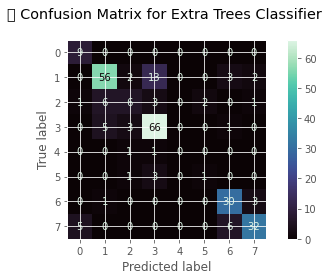

In [356]:
from sklearn import metrics
class_names = df.columns
metrics.plot_confusion_matrix(Final_mod, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

#### Saving Model

In [358]:
import joblib
joblib.dump(Final_mod,'powerplant_classification_Final.pkl')

['powerplant_classification_Final.pkl']

# Machine Learning Model Building Regression

In [360]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

#### Feature Engineering before proceeding

In [383]:
df2=df.copy()

In [384]:
df3=df2.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             660.000000
latitude                 19.212970
longitude                13.258160
primary_fuel              6.000000
other_fuel1               3.000000
source                   96.950000
geolocation_source        2.000000
generation_gwh_2013    4600.499035
generation_gwh_2014    5260.710000
generation_gwh_2015    5078.485600
generation_gwh_2016    5200.793260
generation_gwh_2017    5610.347700
Power_plant_age          39.000000
dtype: float64


In [385]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(876, 13)


In [386]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.932286,0.492496,NaN,NaN,NaN,NaN,NaN,-0.833031
1,-0.514929,0.492496,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.413541,0.492496,NaN,NaN,NaN,NaN,NaN,NaN
3,2.178041,0.492496,-0.110987,-0.108987,0.123448,0.149212,-0.027733,-0.198032
5,-2.753369,-2.030073,0.043362,0.256249,0.333265,0.315123,0.279015,-0.273345


In [387]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)
# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [388]:
data.drop("generation_gwh_2013",axis=1,inplace=True)
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)

## Standard Scaling

In [391]:
# Splitting data in target and dependent feature
X = data.drop(['capacity_mw'], axis =1)
Y = data['capacity_mw']

In [392]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [393]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (586, 6)
Training target vector size: (586,)
Test feature matrix size: (290, 6)
Test target vector size: (290,)


In [394]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.3868214423605554 on Random_state 91


### Linear Regression

In [396]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=91, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [-181.93867184   58.77720266  254.42679734   -8.43554781  244.17668306
  349.12869775  269.59585238  229.67647814  169.7413066   582.24406427
  279.28070914  513.6100736   199.91735015  485.07953568  177.17696934
  178.23578879    9.91140882   35.54795279  251.42329009   38.64998217
  161.77007475  334.43298684  397.23571257  266.63951836  120.62611783
   75.64066592   40.88499449  140.03783821  535.70612584  314.30138562
   75.68267761  170.86121034  212.45623418  515.30688859  319.60017898
  596.00301338  408.58955987  327.82335582  118.38125204  366.03946838
  422.60497776   25.19706935 -168.36938291  260.23913587  422.93171181
  354.54318534  282.29376102  128.22181865  580.01299282   58.48485906
  153.8119115   472.76290051   40.92153426   68.56240496  263.67048762
  495.33609944  405.68491542   49.48350347  419.47334152  504.24828984
  317.9883678   587.89658402  523.74656685  192.95813099   37.1308602
  245.76231679  222.19467036  -16.03295984  106.00021127  306

In [399]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 199.40998294053296
Mean squared error : 84767.06840516202
Root Mean Squared Error: 291.1478463000577


 R2 Score :
0.3928793726381743


### Applying other ML Models

In [400]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 133.7905444572751
Mean squared error : 52312.106863098204
Root Mean Squared Error: 228.7184007969149


 R2 Score :
0.6253290371498916


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 199.409744008917
Mean squared error : 84767.4383760336
Root Mean Squared Error: 291.14848166534136


 R2 Score :
0.39287672282437414


 Error of  DecisionTreeRegressor() :
Mean absolute error : 174.14216730038024
Mean squared error : 109409.1366236958
Root Mean Squared Error: 330.77051958071445


 R2 Score :
0.21638739057715395


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 168.75594333209898
Mean squared error : 61437.41174883973
Root Mean Squared Error: 247.86571313685104


 R2 Score :
0.5599715707265046


 Error of  GradientBoostingRegressor() :
Mean absolute error : 140.07854814209406
Mean squared error : 52869.06392454877
Root Mean Squared Error: 229.93273782684528


 R2 Score :
0.6213399866032188


 Error of

In [401]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.518626513439614


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.2923870106369538


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.15156294425085287


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.4609088198019326


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.4785836067361843


Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lamb

#### Among all Model Random Forest Regressor gave us maximum R2 score  and minimum  RMSE value  . So We will perform Hyper Parameter Tuning on Random Forest Regressor.

In [403]:
from sklearn.model_selection import GridSearchCV

In [402]:
parameter = {'n_estimators':[50,60,80],'max_depth': [10,20,40],
            'criterion':['mse','mae'],'min_samples_leaf': [5,10,15],
             'min_samples_split':[5,10,15,20],
             'max_features':["auto","sqrt","log2"]}

In [405]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose = 5)

In [406]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.488 total time=   0.2s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.464 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.442 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.285 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.257 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.493 total time=   0.2s
[CV 2/5] END criterion=mse, ma

[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.259 total time=   0.2s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.517 total time=   0.3s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.492 total time=   0.2s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.418 total time=   0.2s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.313 total time=   0.2s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.262 total time=   0.2s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_sa

[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.225 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.501 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.503 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.368 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.292 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.229 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, 

[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.234 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.516 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.507 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.361 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.330 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.219 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, 

[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.271 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.525 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.461 total time=   0.2s
[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.391 total time=   0.2s
[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.346 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.261 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.331 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.250 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.490 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.453 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.358 total time=   0.2s
[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.334 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, 

[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.309 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.240 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.456 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.439 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.366 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.344 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, 

[CV 3/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.394 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.324 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.248 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.518 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.454 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.403 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_sam

[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.436 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.376 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.336 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.233 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.480 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.445 total time=   0.2s
[CV 3/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, 

[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.435 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.335 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.325 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.252 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.459 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.448 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_

[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.498 total time=   0.2s
[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.452 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.427 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.286 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.243 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.505 total time=   0.3s
[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_s

[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.274 total time=   0.2s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.493 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.499 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.386 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.300 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.237 total time=   0.2s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_sa

[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.251 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.510 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.494 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.372 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.319 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.252 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, 

[CV 2/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.462 total time=   0.2s
[CV 3/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.387 total time=   0.2s
[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.361 total time=   0.2s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.258 total time=   0.2s
[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.486 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.478 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.479 total time=   0.3s
[CV 2/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.468 total time=   0.2s
[CV 3/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.369 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.353 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.241 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.488 total time=   0.2s
[CV 2/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, 

[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.241 total time=   0.2s
[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.459 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.434 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.357 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.312 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.260 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, 

[CV 5/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.266 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.500 total time=   0.2s
[CV 2/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.487 total time=   0.2s
[CV 3/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.400 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.352 total time=   0.2s
[CV 5/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.267 total time=   0.2s
[CV 1/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_sam

[CV 4/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.337 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.269 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.488 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.461 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.354 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.321 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, 

[CV 3/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.363 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.309 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.234 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.463 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.426 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.349 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min

[CV 2/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.485 total time=   0.2s
[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.449 total time=   0.2s
[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.258 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.243 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.517 total time=   0.2s
[CV 2/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.461 total time=   0.2s
[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_s

[CV 2/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.494 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.379 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.278 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.257 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.516 total time=   0.2s
[CV 2/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.509 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_sa

[CV 1/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.510 total time=   0.2s
[CV 2/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.507 total time=   0.2s
[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.398 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.284 total time=   0.2s
[CV 5/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.229 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.548 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, m

[CV 5/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.230 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.528 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.491 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.378 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.342 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.207 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, 

[CV 4/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.340 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.239 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.502 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.470 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.396 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.379 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 3/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.366 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.318 total time=   0.2s
[CV 5/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.224 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.489 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.446 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.374 total time=   0.2s
[CV 4/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, 

[CV 2/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.446 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.335 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.303 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.235 total time=   0.2s
[CV 1/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.473 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.429 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, 

[CV 1/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.511 total time=   0.2s
[CV 2/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.470 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.398 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.332 total time=   0.2s
[CV 5/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.269 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.511 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_sam

[CV 5/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.264 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.491 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.427 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.370 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.327 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.255 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, 

[CV 4/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.338 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.256 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.478 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.452 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.332 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.324 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, mi

[CV 3/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.424 total time=   0.6s
[CV 4/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.310 total time=   0.6s
[CV 5/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.207 total time=   0.6s
[CV 1/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.542 total time=   0.8s
[CV 2/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.441 total time=   0.8s
[CV 3/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.431 total time=   0.8s
[CV 4/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_s

[CV 2/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.466 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.365 total time=   0.4s
[CV 4/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.285 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.214 total time=   0.5s
[CV 1/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.515 total time=   0.6s
[CV 2/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.433 total time=   0.7s
[CV 3/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_sa

[CV 1/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.488 total time=   0.5s
[CV 2/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.457 total time=   0.6s
[CV 3/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.346 total time=   0.5s
[CV 4/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.281 total time=   0.5s
[CV 5/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.217 total time=   0.5s
[CV 1/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.537 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, m

[CV 5/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.184 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.534 total time=   0.4s
[CV 2/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.416 total time=   0.4s
[CV 3/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.352 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.299 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.222 total time=   0.4s
[CV 1/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, 

[CV 4/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.335 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.204 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.465 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.384 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.345 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.367 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 3/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.330 total time=   0.4s
[CV 4/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.287 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.202 total time=   0.4s
[CV 1/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.420 total time=   0.5s
[CV 2/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.339 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.314 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, 

[CV 2/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.303 total time=   0.1s
[CV 3/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.289 total time=   0.1s
[CV 4/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.294 total time=   0.1s
[CV 5/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.202 total time=   0.1s
[CV 1/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.404 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.251 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, 

[CV 1/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.537 total time=   0.4s
[CV 2/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.419 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.385 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.338 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.215 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.484 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_sam

[CV 5/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.191 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.456 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.360 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.318 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.310 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.227 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, 

[CV 4/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.301 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.213 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.378 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.298 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.294 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.309 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, mi

[CV 3/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.402 total time=   0.4s
[CV 4/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.311 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.194 total time=   0.5s
[CV 1/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.499 total time=   0.7s
[CV 2/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.437 total time=   0.6s
[CV 3/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.443 total time=   0.7s
[CV 4/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_s

[CV 2/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.454 total time=   0.4s
[CV 3/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.360 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.259 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.191 total time=   0.5s
[CV 1/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.489 total time=   0.4s
[CV 2/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.467 total time=   0.4s
[CV 3/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_sa

[CV 1/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.508 total time=   0.5s
[CV 2/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.443 total time=   0.5s
[CV 3/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.338 total time=   0.5s
[CV 4/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.269 total time=   0.5s
[CV 5/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.193 total time=   0.5s
[CV 1/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.492 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, m

[CV 5/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.189 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.514 total time=   0.4s
[CV 2/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.414 total time=   0.4s
[CV 3/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.377 total time=   0.4s
[CV 4/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.320 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.188 total time=   0.5s
[CV 1/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, 

[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.339 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.231 total time=   0.4s
[CV 1/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.520 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.391 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.334 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.311 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 3/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.303 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.307 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.225 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.445 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.321 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.314 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, 

[CV 3/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.299 total time=   0.1s
[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.280 total time=   0.1s
[CV 5/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.167 total time=   0.1s
[CV 1/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.418 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.269 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.264 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, 

[CV 2/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.413 total time=   0.4s
[CV 3/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.380 total time=   0.4s
[CV 4/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.348 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.238 total time=   0.4s
[CV 1/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.485 total time=   0.4s
[CV 2/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.387 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_sam

[CV 1/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.445 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.309 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.324 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.304 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.209 total time=   0.4s
[CV 1/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.441 total time=   0.4s
[CV 2/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, 

[CV 5/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.169 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.403 total time=   0.1s
[CV 2/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.304 total time=   0.1s
[CV 3/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.256 total time=   0.1s
[CV 4/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.299 total time=   0.1s
[CV 5/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.212 total time=   0.1s
[CV 1/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, m

[CV 4/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.298 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.233 total time=   0.4s
[CV 1/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.558 total time=   0.7s
[CV 2/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.424 total time=   0.7s
[CV 3/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.432 total time=   0.7s
[CV 4/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.316 total time=   0.7s
[CV 5/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_s

[CV 3/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.348 total time=   0.4s
[CV 4/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.275 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.219 total time=   0.4s
[CV 1/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.512 total time=   0.6s
[CV 2/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.459 total time=   0.5s
[CV 3/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.351 total time=   0.4s
[CV 4/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_sa

[CV 2/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.465 total time=   0.7s
[CV 3/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.347 total time=   0.6s
[CV 4/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.286 total time=   0.6s
[CV 5/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.221 total time=   0.6s
[CV 1/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.508 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.411 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, mi

[CV 1/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.510 total time=   0.4s
[CV 2/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.391 total time=   0.4s
[CV 3/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.348 total time=   0.4s
[CV 4/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.289 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.208 total time=   0.4s
[CV 1/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.500 total time=   0.6s
[CV 2/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, 

[CV 5/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.233 total time=   0.4s
[CV 1/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.453 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.376 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.362 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.361 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.209 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 4/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.333 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.231 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.459 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.313 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.327 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.315 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, 

[CV 3/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.273 total time=   0.1s
[CV 4/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.281 total time=   0.1s
[CV 5/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.217 total time=   0.1s
[CV 1/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.394 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.274 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.272 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, 

[CV 2/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.408 total time=   0.5s
[CV 3/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.376 total time=   0.4s
[CV 4/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.360 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.227 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.483 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.380 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_sam

[CV 1/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.469 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.312 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.340 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.291 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.253 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.472 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, 

[CV 5/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.207 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.379 total time=   0.1s
[CV 2/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.298 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.268 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.304 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.184 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, m

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [50, 60, 80]},
             verbose=5)

In [407]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 80}

## Final Regression Model

In [427]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=80 ,criterion = 'mse', max_depth= 40, max_features = 'sqrt',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 141.05409058019228
Mean squared error : 49369.46902797884
Root Mean Squared Error: 222.19241442492776


 R2 Score of Final Model :
0.6464048648524281




 True Values Vs Predicted Value plot :


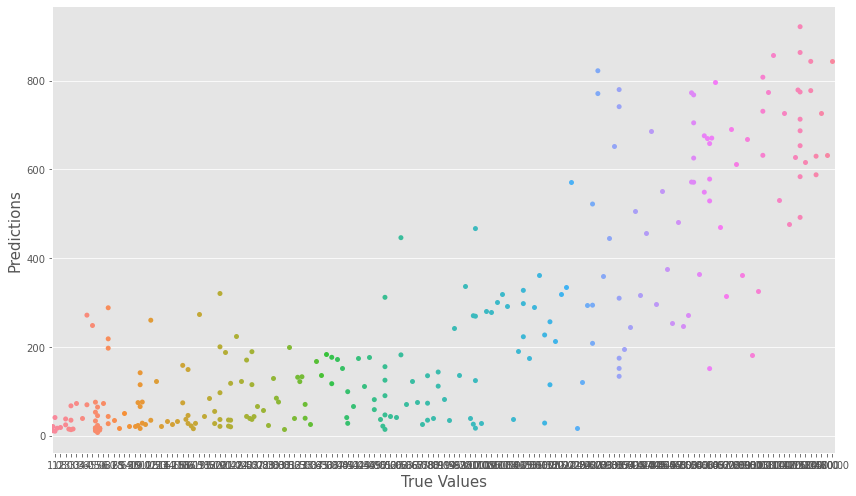

In [428]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Final Regression Saving Model

In [429]:
import joblib
joblib.dump(Final_mod,'Powerplant_regression_Final.pkl')

['Powerplant_regression_Final.pkl']